In [118]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [138]:
def lookup(name):
    conn = pymysql.connect(
        host = '172.18.40.65',
        user = 'root',
        passwd = 'root',
        db = 'poker',
        port=3306,
        charset = 'utf8'
    )
    df = pd.read_sql('select * from slumbot where name like "{}"'.format(name),conn)
    
    stat = pd.DataFrame(columns=['srange', 'count'])
    stat.loc[stat.shape[0]] = ["50", 0]
    stat.loc[stat.shape[0]] = ["100", 0]
    stat.loc[stat.shape[0]] = ["100~200", 0]
    stat.loc[stat.shape[0]] = ["200~300", 0]
    stat.loc[stat.shape[0]] = ["300~500", 0]
    stat.loc[stat.shape[0]] = ["500~1k", 0]
    stat.loc[stat.shape[0]] = ["1k~2k", 0]
    stat.loc[stat.shape[0]] = ["2k~3k", 0]
    stat.loc[stat.shape[0]] = ["3k~5k", 0]
    stat.loc[stat.shape[0]] = ["5k~7k", 0]
    stat.loc[stat.shape[0]] = ["7k~1w", 0]
    stat.loc[stat.shape[0]] = ["1w~1.5w", 0]
    stat.loc[stat.shape[0]] = ["1.5w~2w", 0]
    stat.loc[stat.shape[0]] = ["2w", 0]
    x = [50, 100, 101, 201, 301, 501,  1001, 2001, 3001, 5001, 7001, 10001, 15001, 20000] 
    y = [51, 101, 201, 301, 501, 1001, 2001, 3001, 5001, 7001, 10001, 15000, 20000, 20001]
    a = []
    for row in range(df.shape[0]):
        m = int(df.iloc[row, 5])
        a.append(m)
        if abs(m) == 0:
            continue
        count = 0
        for i in range(14):
            if abs(m) >= x[i] and abs(m) < y[i]:
                stat.iloc[i, 1] += m
                count += 1
        if count != 1:
            print(m, count)
    a = np.array(a)
    print("总局数: {}, 总赢钱: {:.2f}(筹码), 平均 {:.2f} ± {:.2f}(筹码)".format(a.shape[0], np.sum(a), np.mean(a), 1.96 * np.std(a) / np.sqrt(a.shape[0])))
    import matplotlib.pyplot as plt
    plt.rcParams['figure.dpi'] = 400
    plt.figure(figsize=(15, 5))
    sns.barplot(x="srange", y="count", data=stat)
    plt.xlabel('获胜筹码范围', size=12)
    plt.ylabel('\n'.join('总赢钱'), size=12, rotation='horizontal')
    plt.title("{}每局收益筹码分布".format(name), size=15)

总局数: 46297, 总赢钱: 126800.00(筹码), 平均 2.74 ± 14.13(筹码)


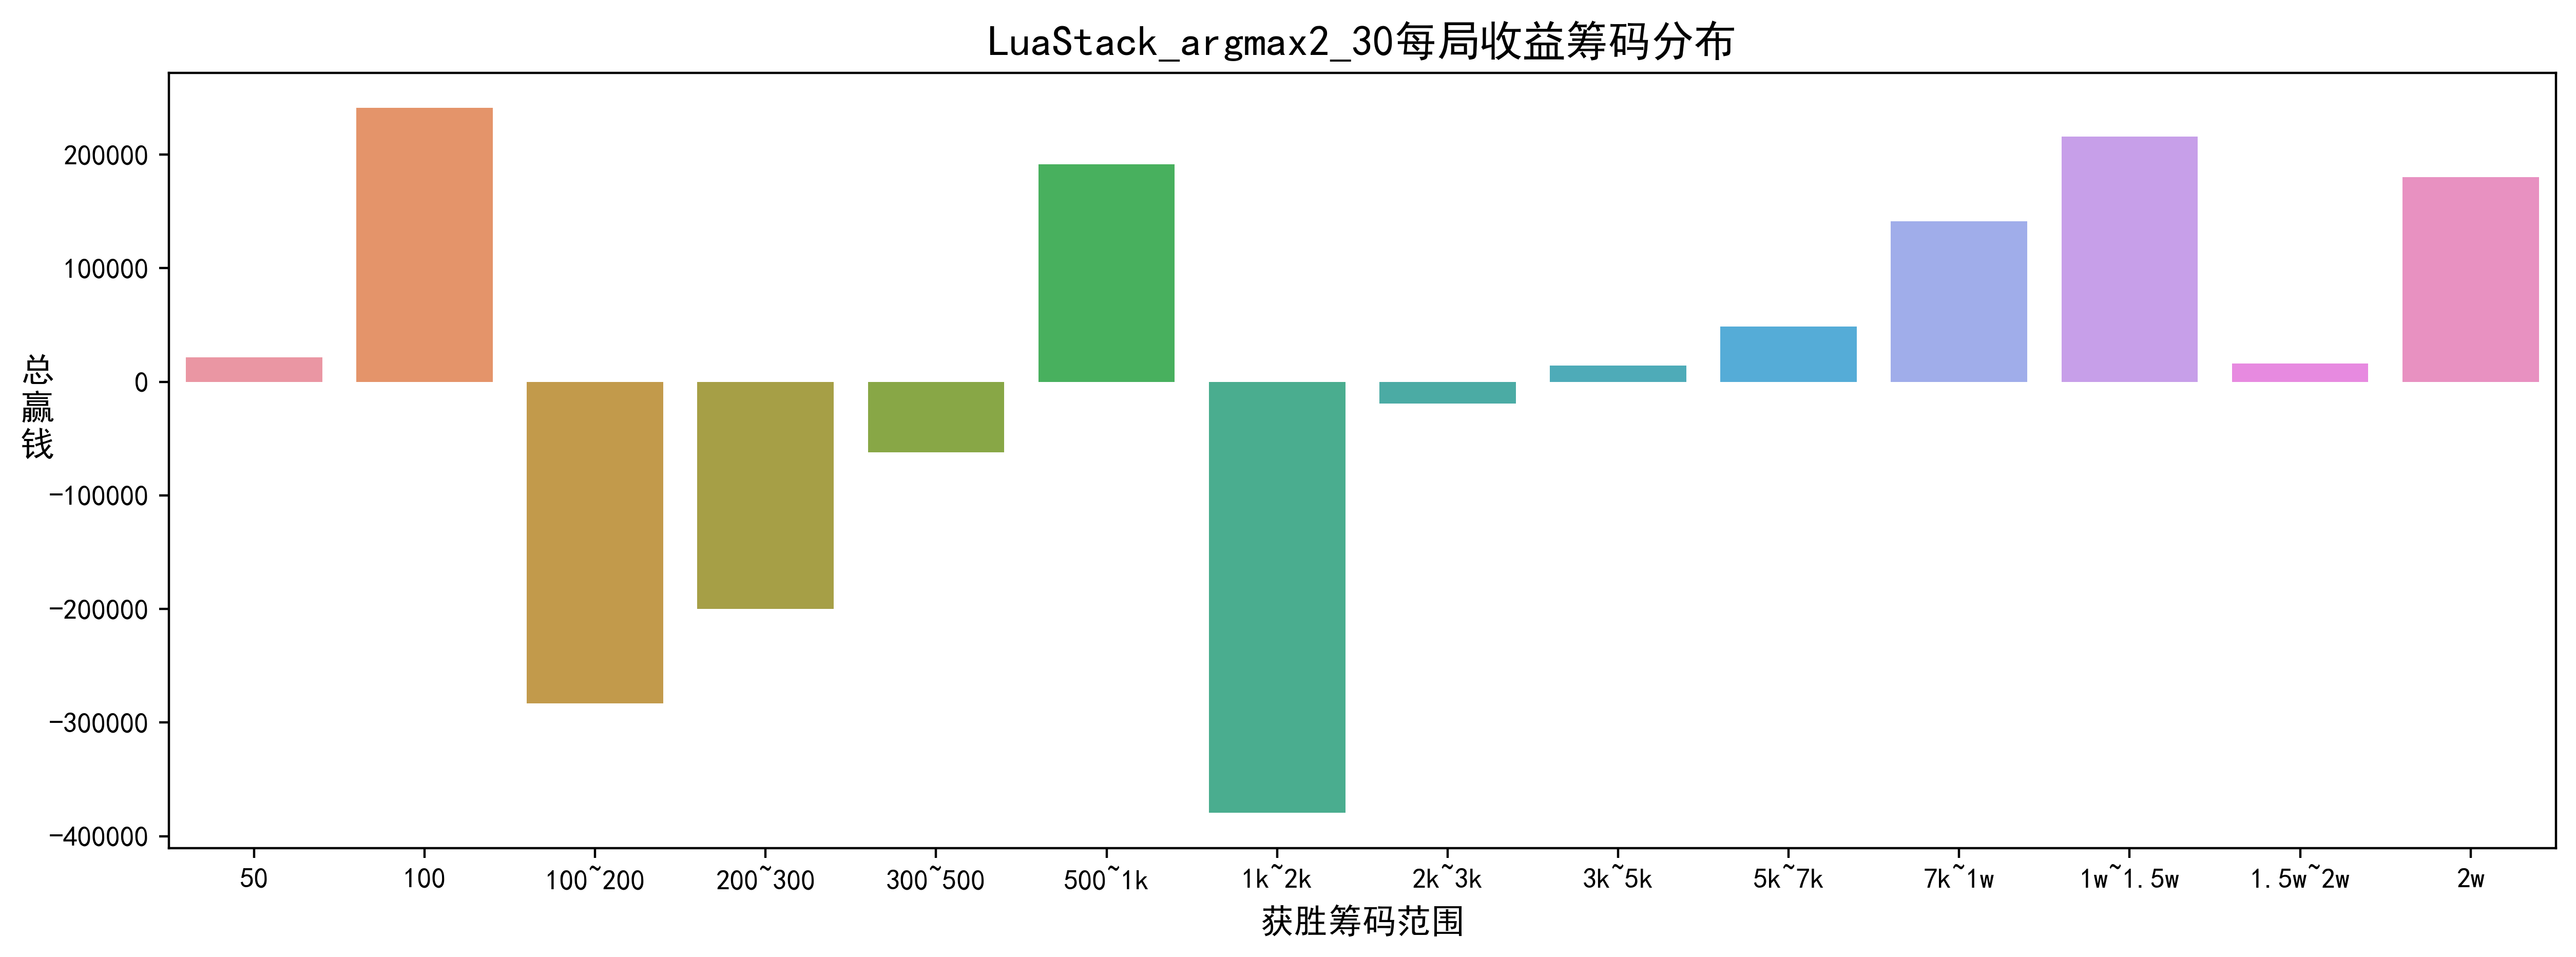

In [141]:
lookup("LuaStack_argmax2_30")

总局数: 15165, 总赢钱: 44200.00(筹码), 平均 2.91 ± 25.81(筹码)


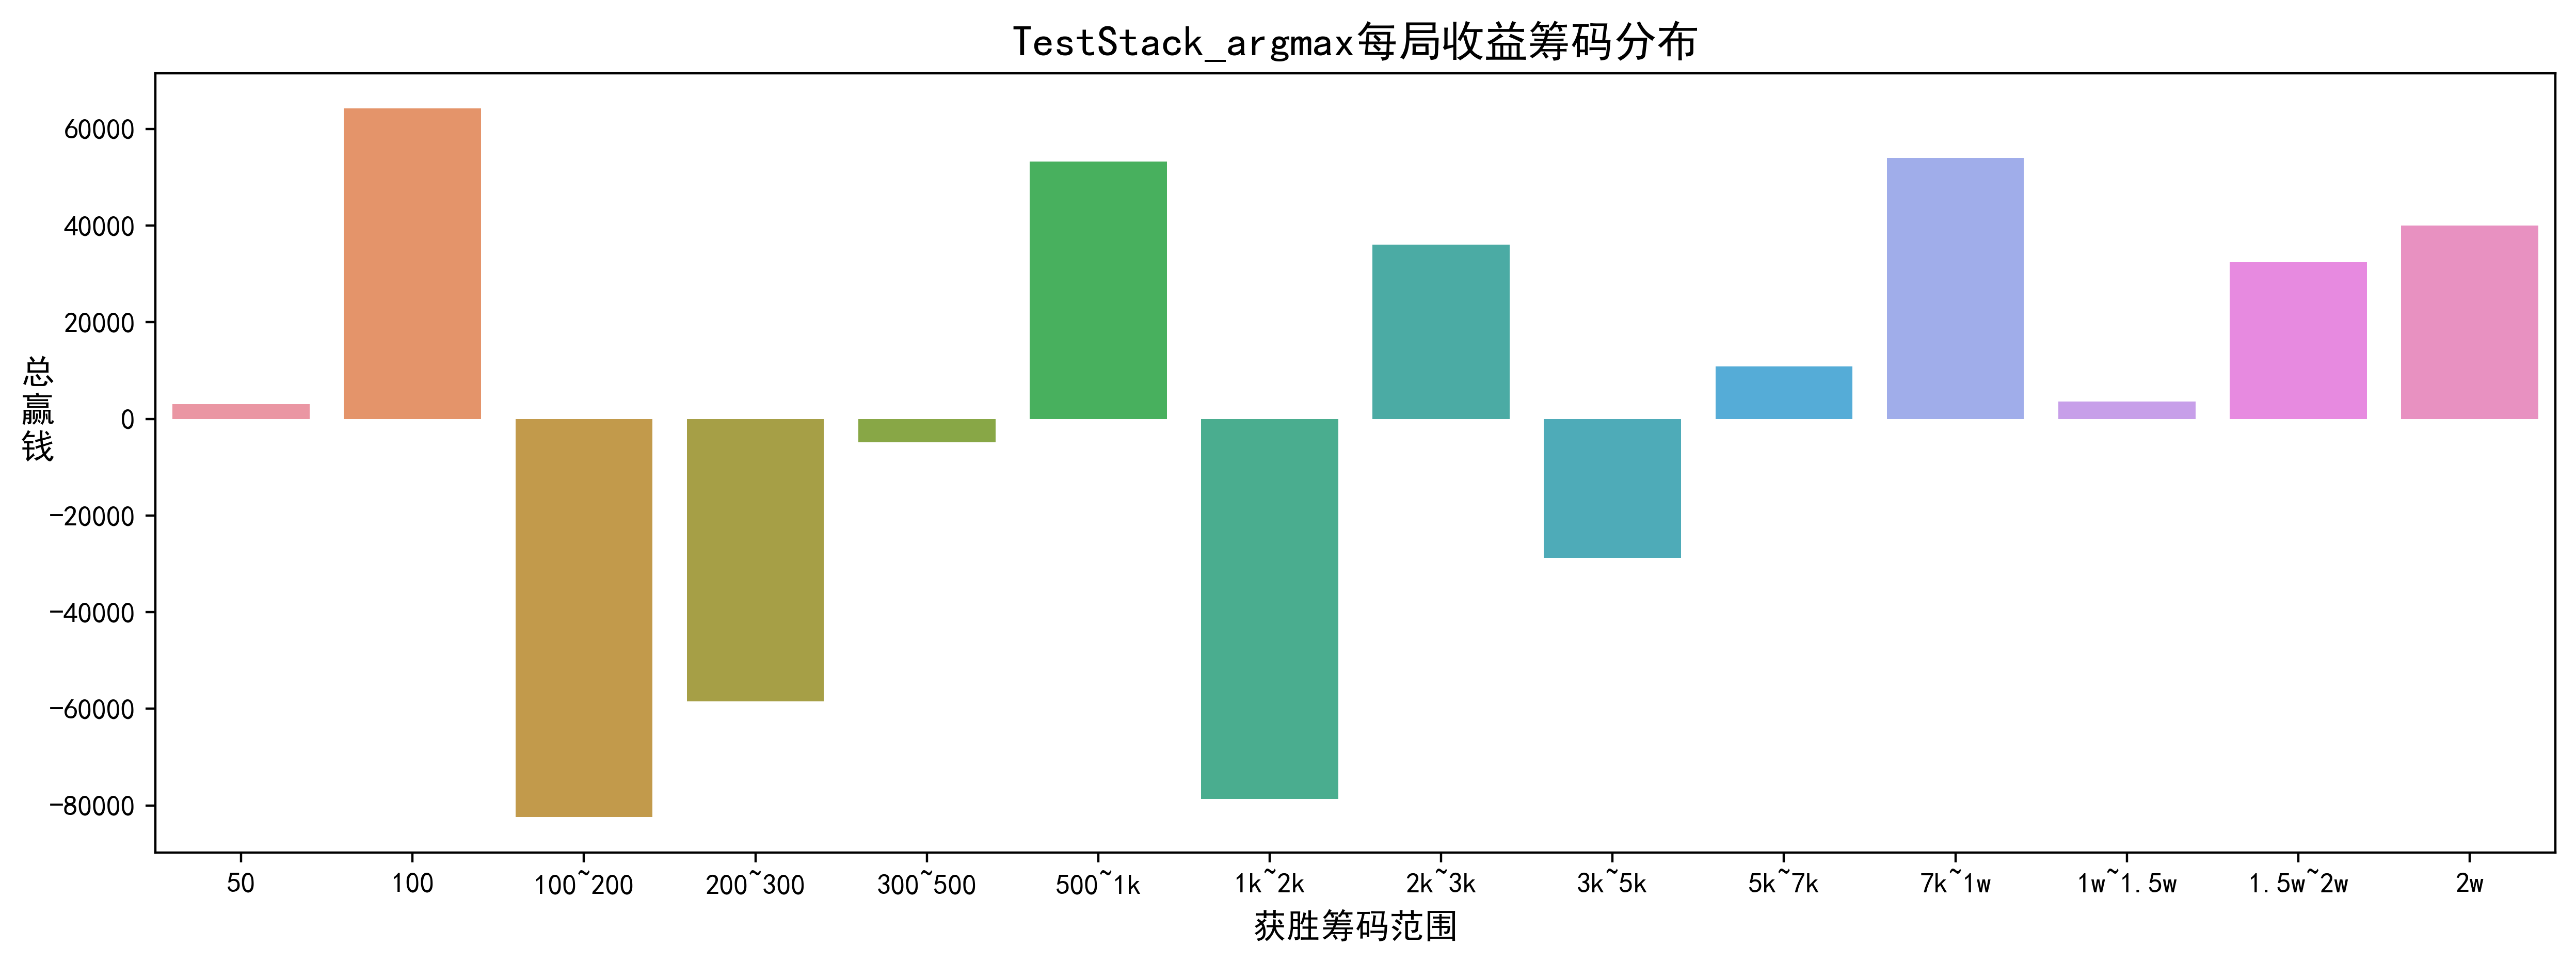

In [140]:
lookup("TestStack_argmax")

总局数: 25968, 总赢钱: 145150.00(筹码), 平均: 5.59(筹码)


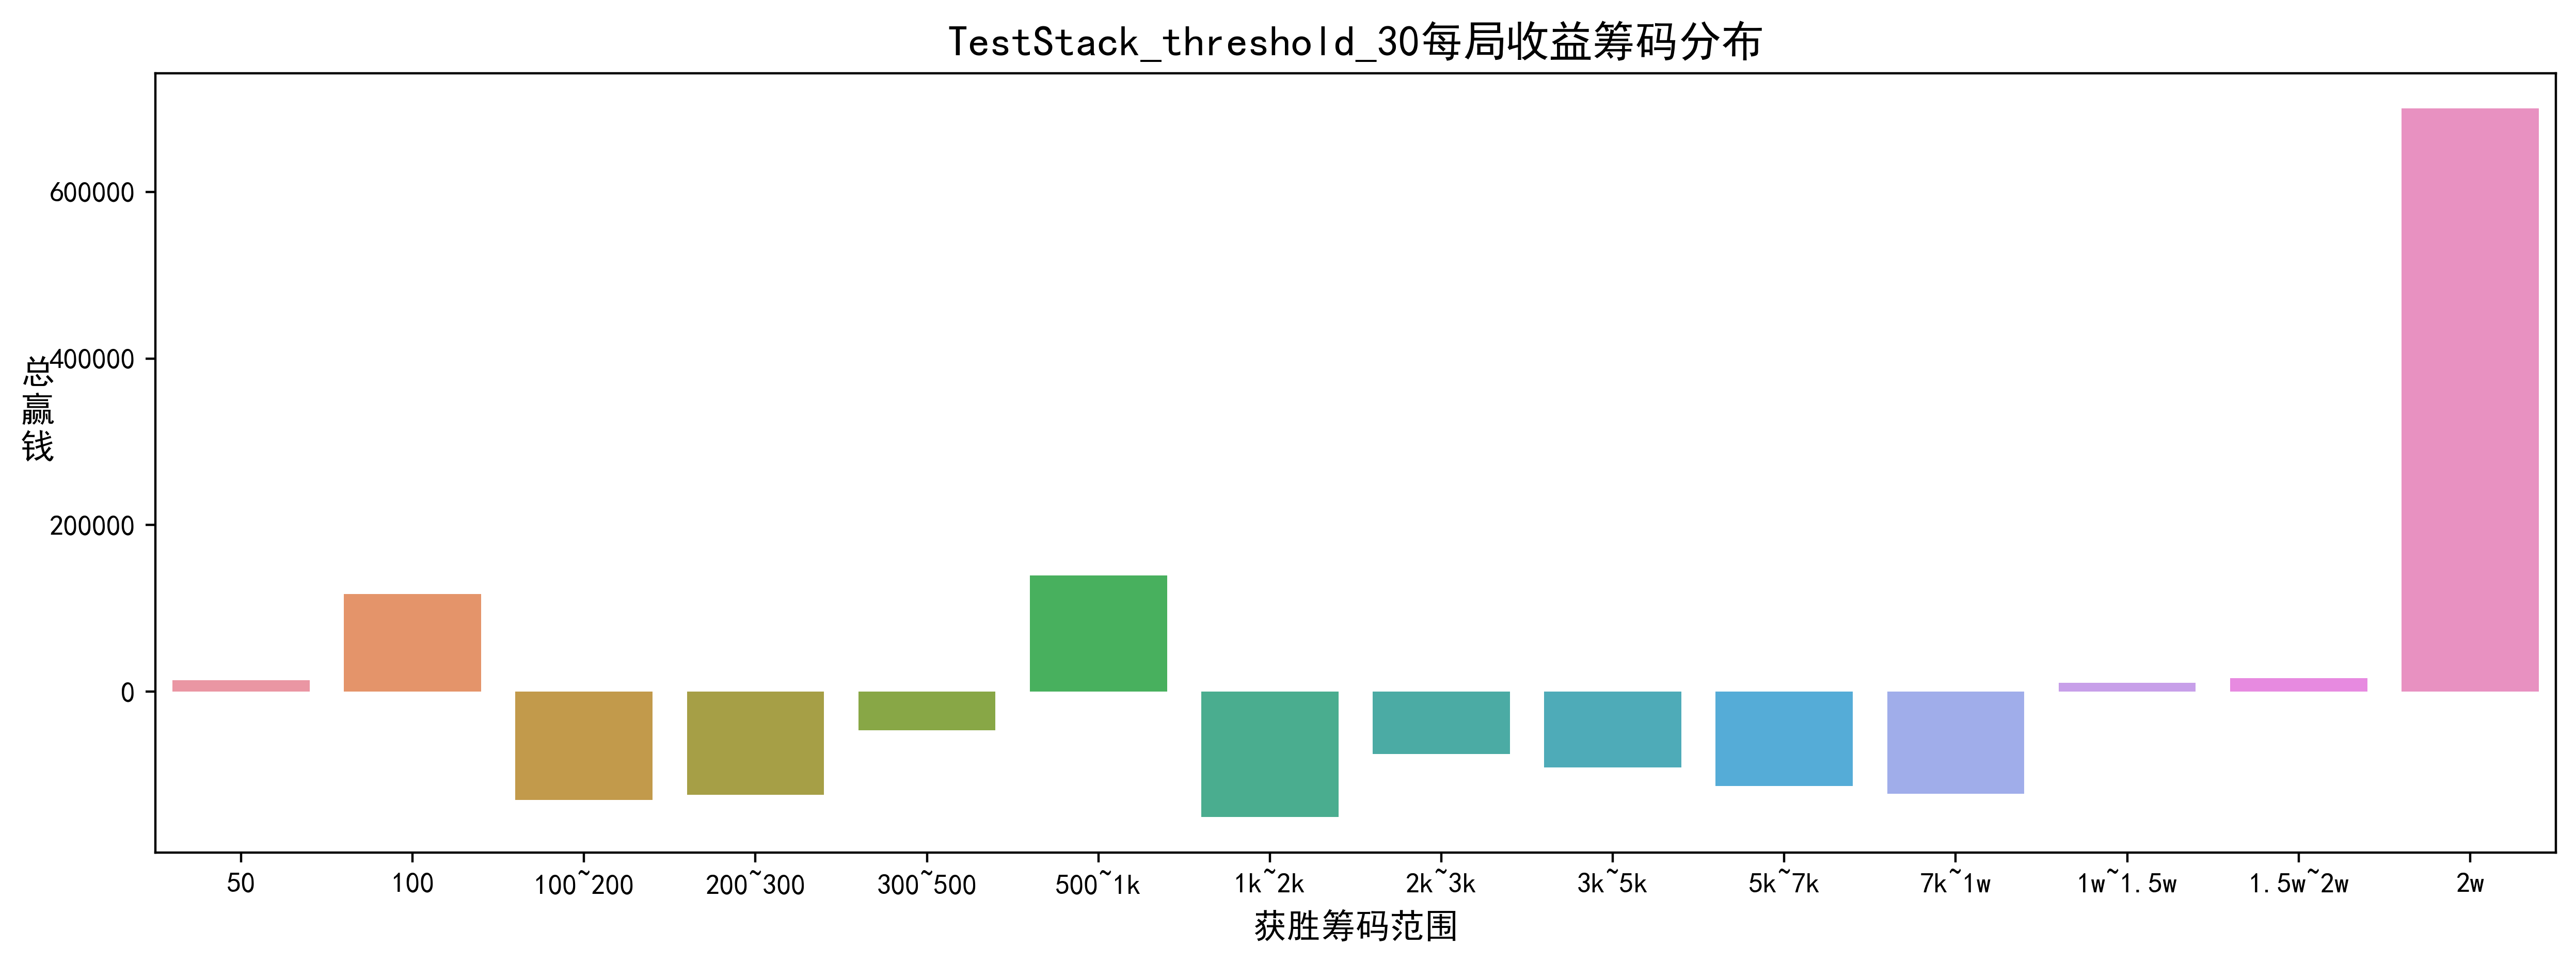

In [107]:
lookup("TestStack_threshold_30")

总局数: 5697, 总赢钱: -36200.00(筹码), 平均: -6.35(筹码)


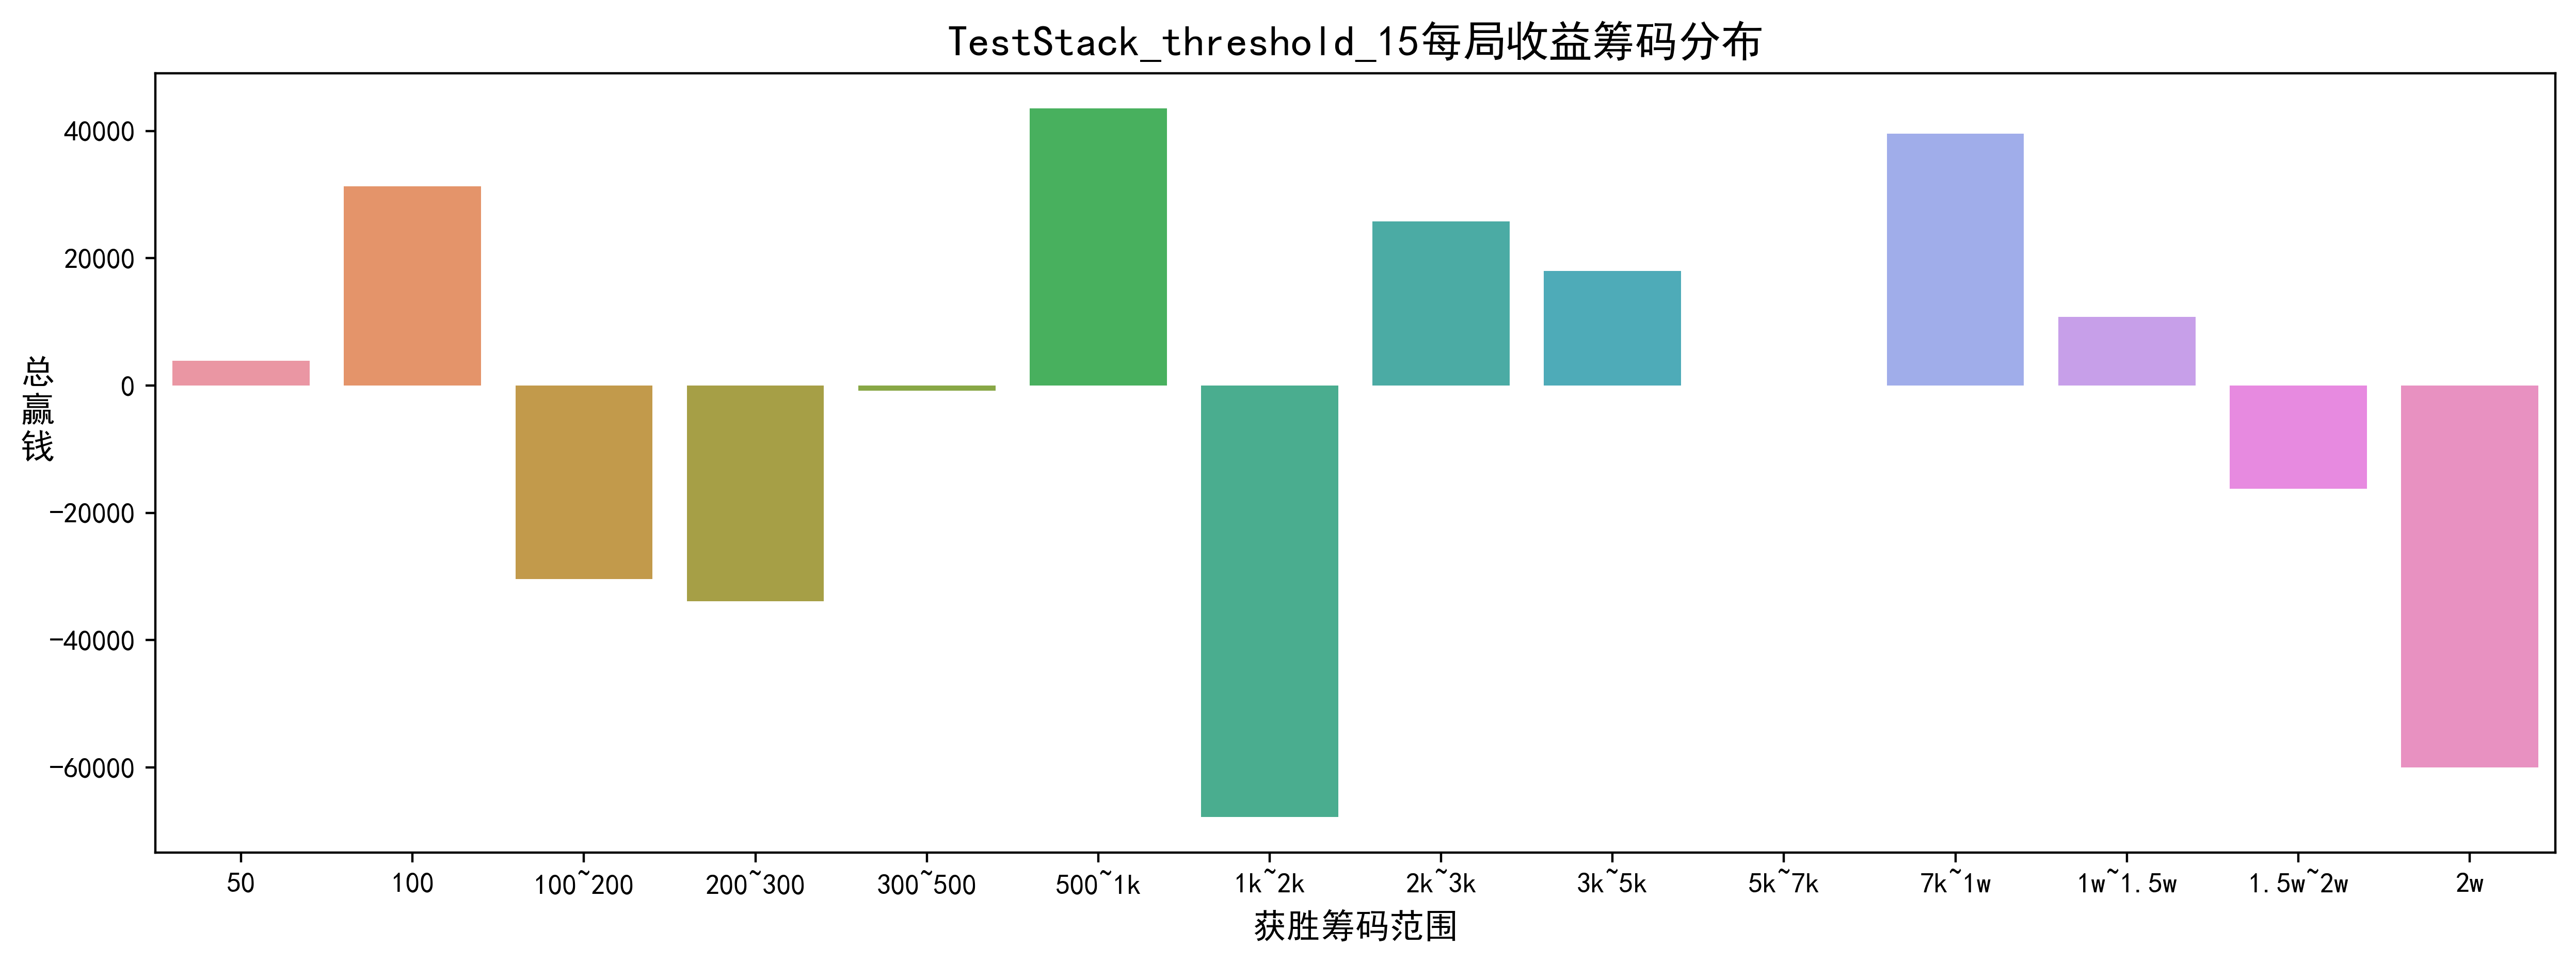

In [104]:
lookup("TestStack_threshold_15")

总局数: 12277, 总赢钱: -353823.00(筹码), 平均: -28.82(筹码)


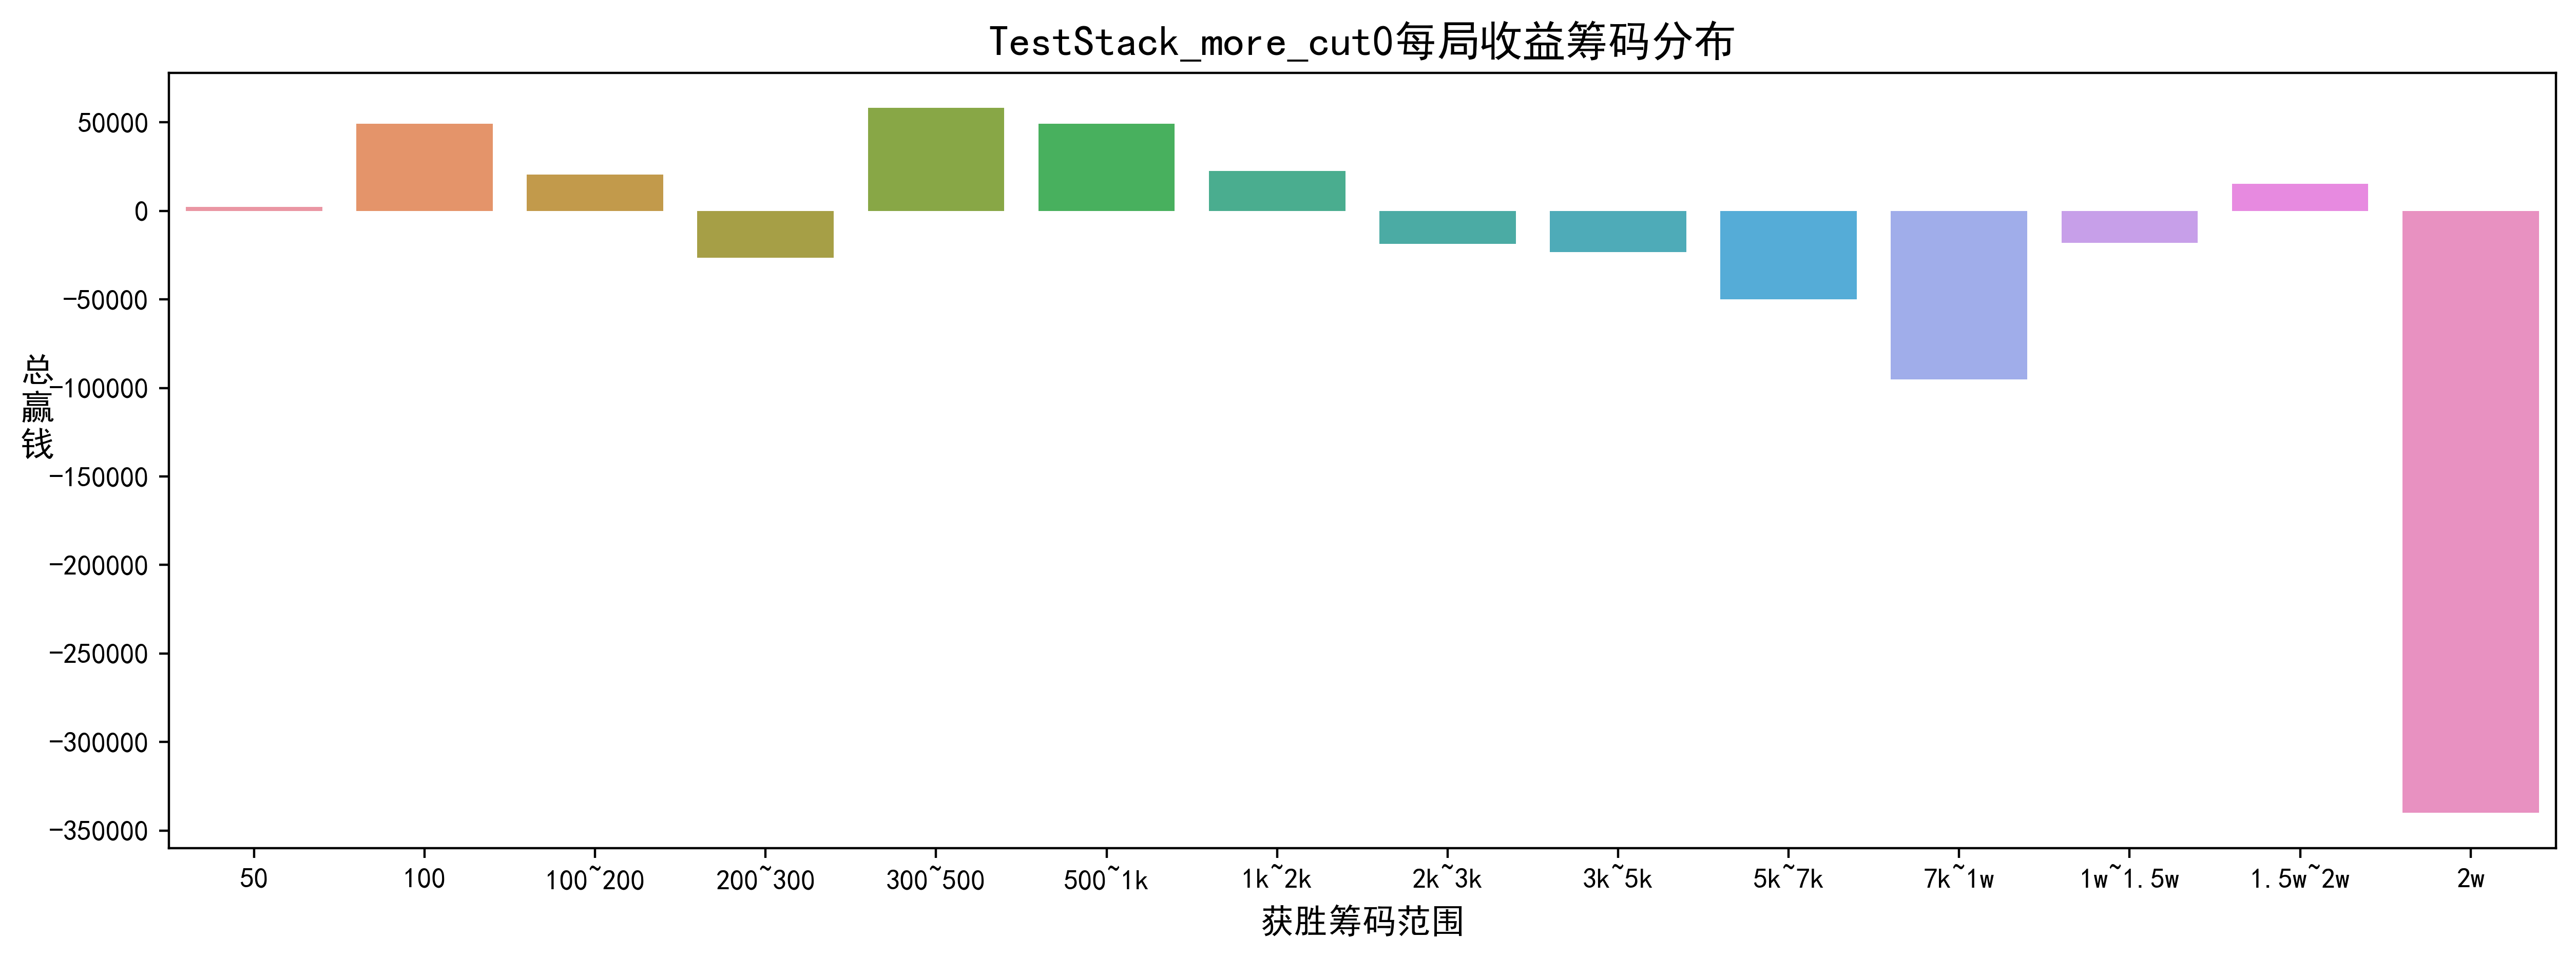

In [105]:
lookup("TestStack_more_cut0")

In [ ]:
lookup()

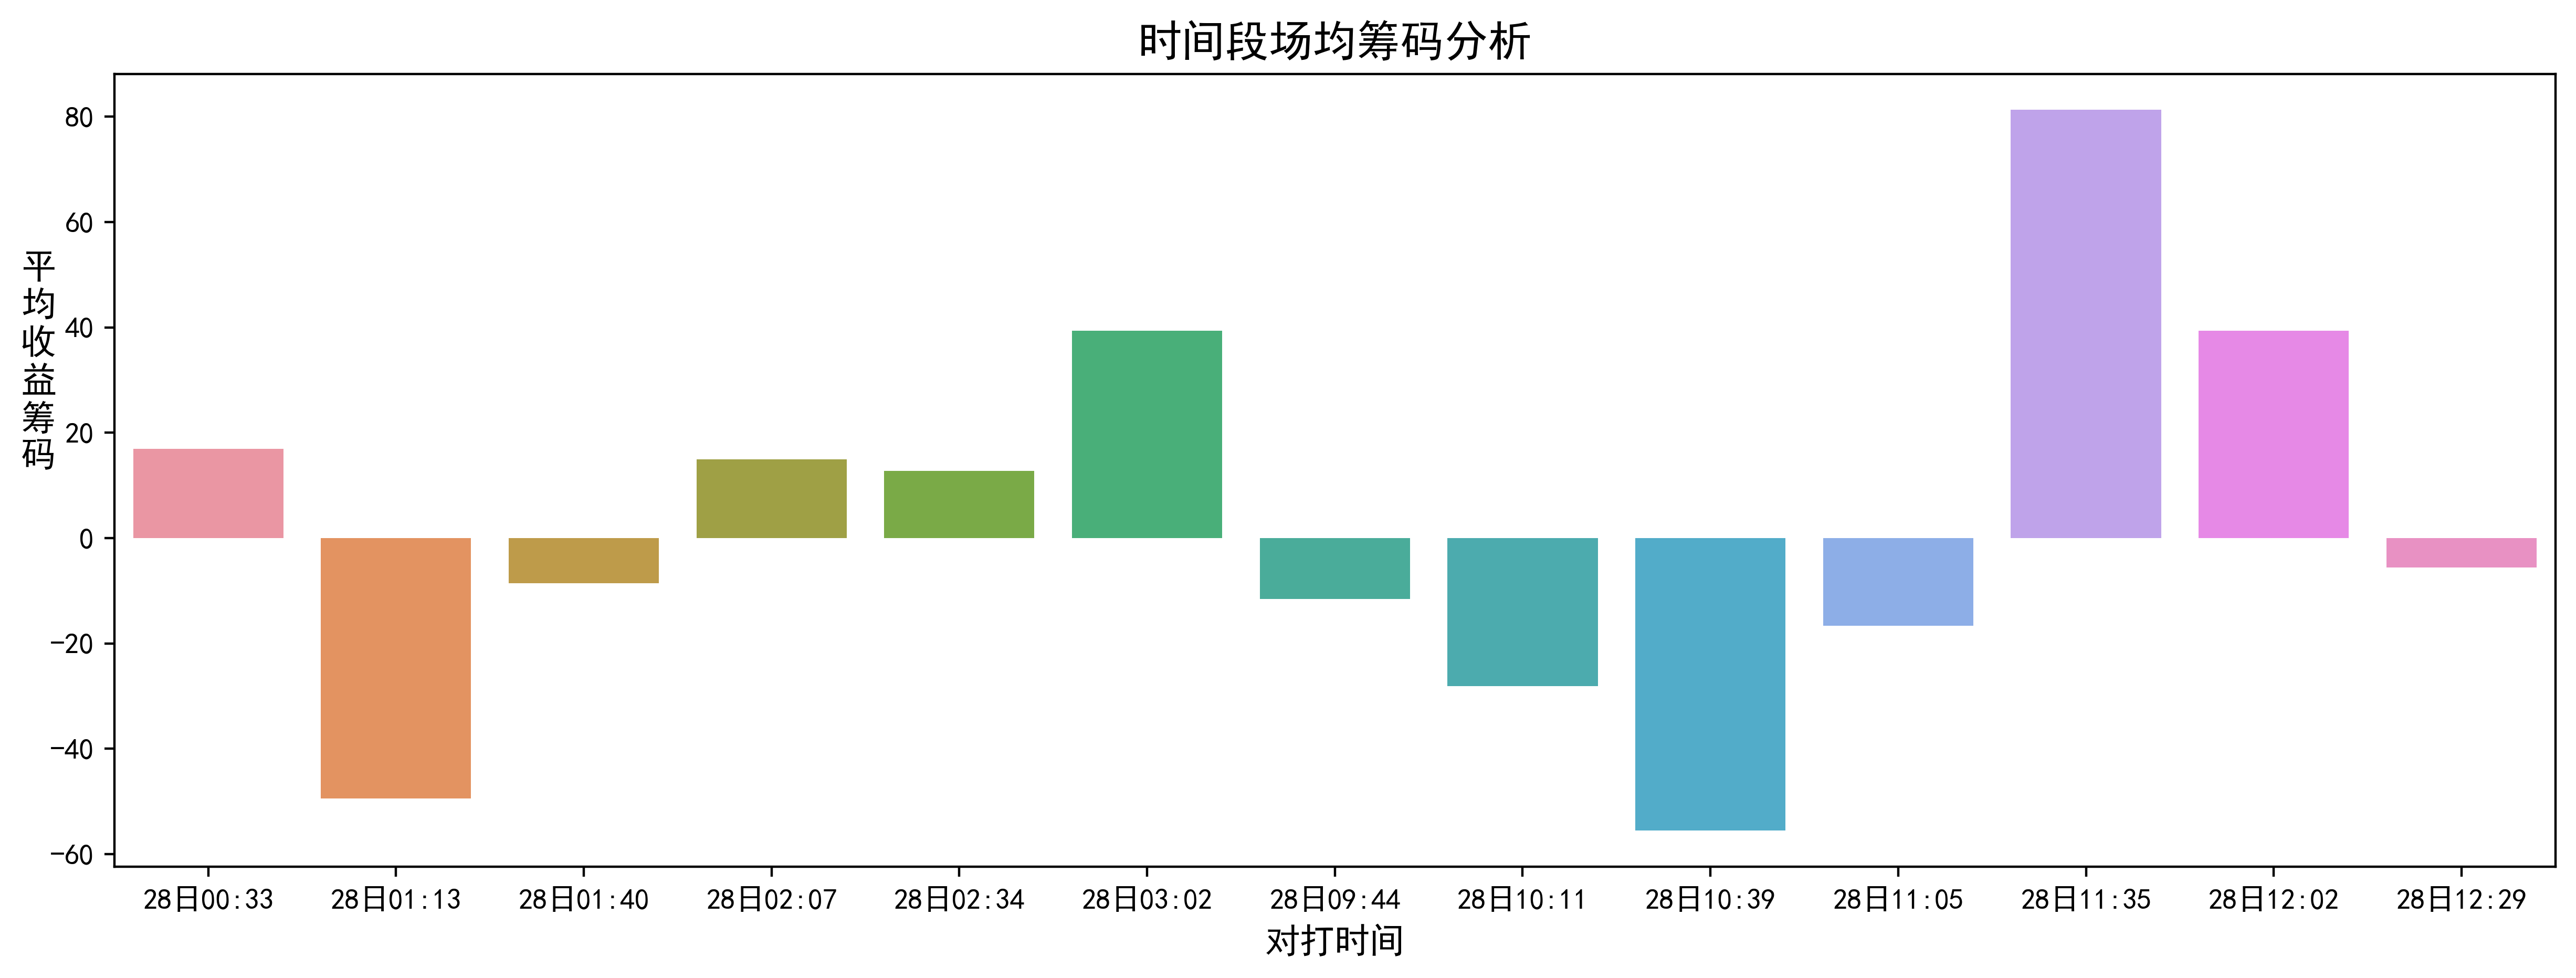

In [24]:
stat = pd.DataFrame(columns=['srange', 'count', 'num'])
interval = df.shape[0] // 12
for row in range(df.shape[0]):
    if row % interval == 0:
        month = str(df.iloc[row, -1])[5:7]    
        day = str(df.iloc[row, -1])[8:10]
        hour = str(df.iloc[row, -1])[11:13]    
        minute = str(df.iloc[row,-1])[14:16]
        stat.loc[stat.shape[0]] = ["{}日{}:{}".format(day, hour, minute), 0, 0]
    m = int(df.iloc[row, 5])
    stat.iloc[stat.shape[0] - 1, 1] += m
    stat.iloc[stat.shape[0] - 1, 2] += 1
    
for i in range(stat.shape[0]):
    stat.iloc[i][1] /= stat.iloc[i][2]
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(15, 5))
sns.barplot(x="srange", y="count", data=stat)
plt.xlabel('对打时间', size=12)
plt.ylabel('\n'.join('平均收益筹码'), size=12, rotation='horizontal')
plt.title("时间段场均筹码分析", size=15)
plt.savefig("时间段场均筹码分析.jpg")